In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
file_path = 'Indian_automobile_dataset.csv'  # Update with the correct file path
df = pd.read_csv('/content/Indian automoble buying behavour study 1.0.csv')

In [13]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000


In [25]:
print('Dataset Overview:')

print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Personal loan     99 non-null     int64
 6   House Loan        99 non-null     int64
 7   Wife Working      99 non-null     int64
 8   Salary            99 non-null     int64
 9   Wife Salary       99 non-null     int64
 10  Total Salary      99 non-null     int64
 11  Make              99 non-null     int64
 12  Price             99 non-null     int64
dtypes: int64(13)
memory usage: 10.2 KB
None


In [11]:
print(df.describe())

             Age  Profession  Marrital Status  Education  No of Dependents  \
count  99.000000   99.000000        99.000000  99.000000         99.000000   
mean   36.313131    0.646465         0.151515   0.565657          2.181818   
std     6.246054    0.480500         0.360375   0.498193          1.335265   
min    26.000000    0.000000         0.000000   0.000000          0.000000   
25%    31.000000    0.000000         0.000000   0.000000          2.000000   
50%    36.000000    1.000000         0.000000   1.000000          2.000000   
75%    41.000000    1.000000         0.000000   1.000000          3.000000   
max    51.000000    1.000000         1.000000   1.000000          4.000000   

       Personal loan  House Loan  Wife Working        Salary   Wife Salary  \
count      99.000000   99.000000     99.000000  9.900000e+01  9.900000e+01   
mean        0.323232    0.373737      0.545455  1.736364e+06  5.343434e+05   
std         0.470091    0.486257      0.520454  6.736217e+05  6

In [12]:
df.isna().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


In [18]:
df['Profession'].value_counts()

,count
Profession,
1,64
0,35


In [30]:
df['Loans'] = df['Personal loan'] + df['House Loan']


In [14]:
df['Marrital Status'].value_counts()

,count
Marrital Status,
0,84
1,15


In [16]:
df['No of Dependents'].value_counts()

,count
No of Dependents,
3,34
2,29
0,22
4,14


In [31]:

df['Loans'].value_counts()

,count
Loans,
0,54
2,24
1,21


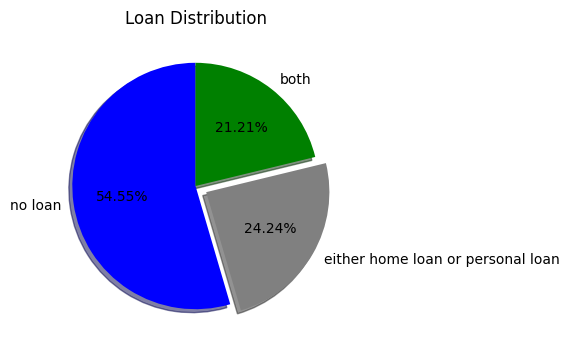

In [34]:
x = df['Loans'].value_counts()
labels = ['no loan','either home loan or personal loan','both']
colors = ['blue','grey','green']
explode = [0,0.1,0]
plt.figure(figsize=(4,4))
plt.pie(x,labels=labels,colors=colors,startangle=90,explode=explode,shadow=True,autopct = '%.2f%%')
plt.title("Loan Distribution")
plt.show()

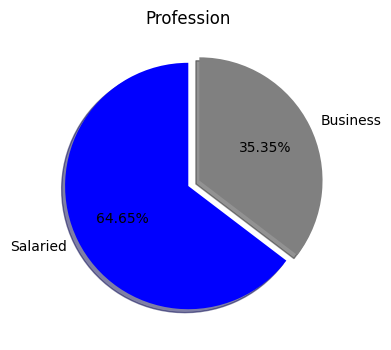

In [20]:
x = df['Profession'].value_counts()
labels = ['Salaried','Business']
colors = ['blue','grey']
explode = [0,0.1]
plt.figure(figsize=(4,4))
plt.pie(x,labels=labels,colors=colors,startangle=90,explode=explode,shadow=True,autopct = '%.2f%%')
plt.title("Profession")
plt.show()

<ipython-input-23-c73b0242d80d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Age',palette='tab10')


<Axes: xlabel='Age', ylabel='count'>

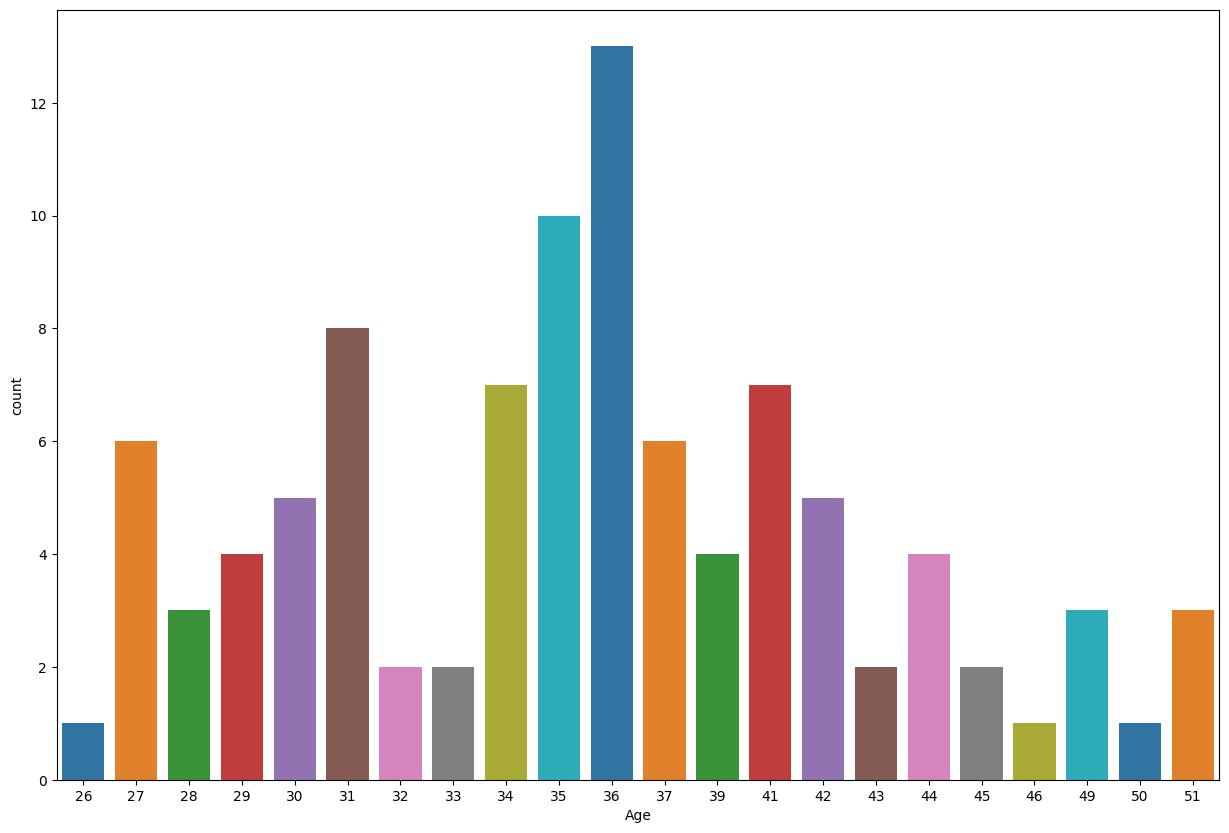

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Age',palette='tab10')

<Axes: >

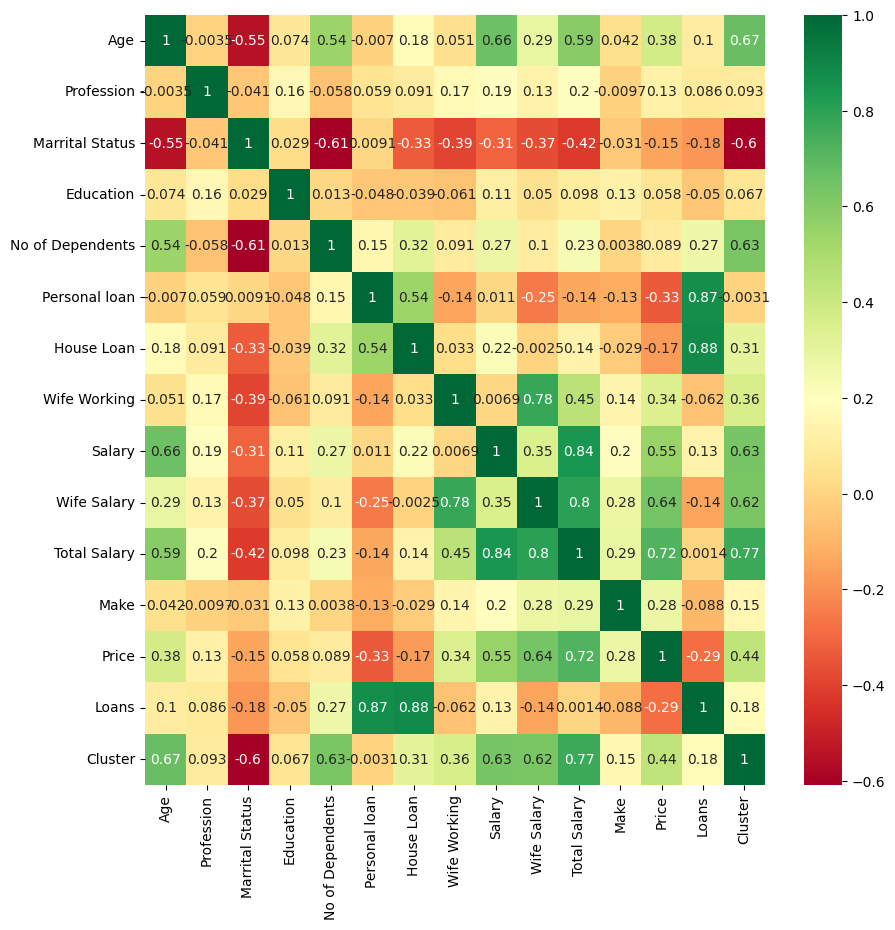

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [35]:
categorical_cols = ['Profession', 'Marrital Status', 'Education', 'Wife Working', 'Make', 'Loans']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [36]:
features = df[['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price', 'No of Dependents']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

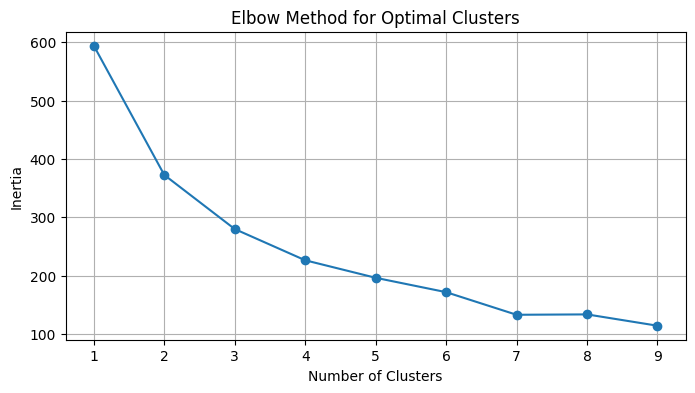

In [37]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()


In [38]:
optimal_clusters = 3  # Update based on Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

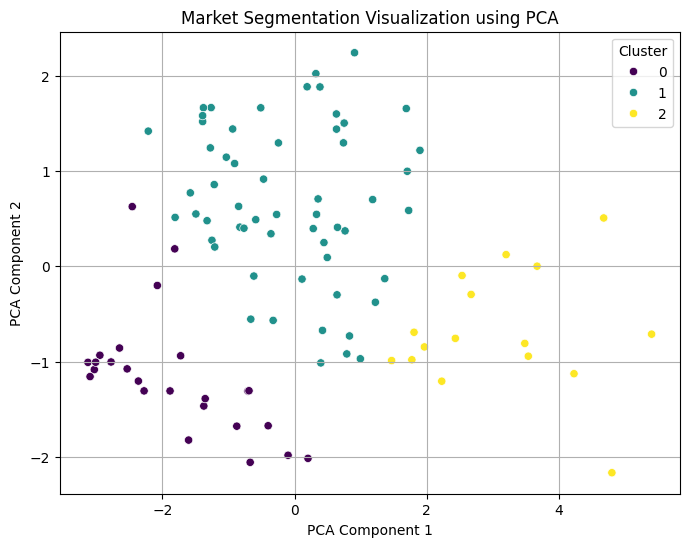

In [39]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Market Segmentation Visualization using PCA')
plt.grid(True)
plt.show()

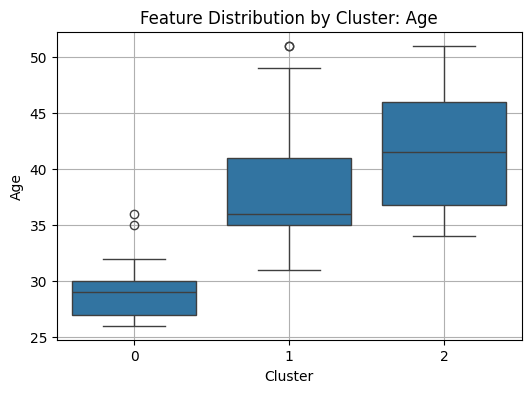

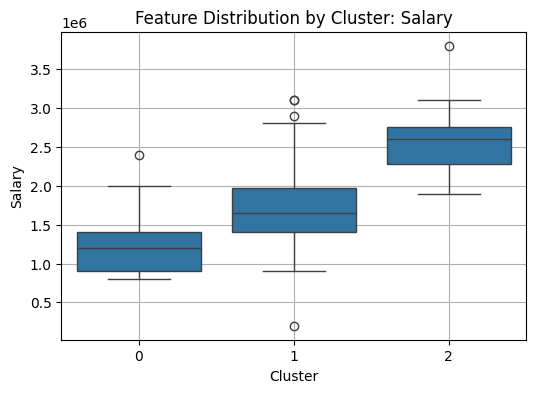

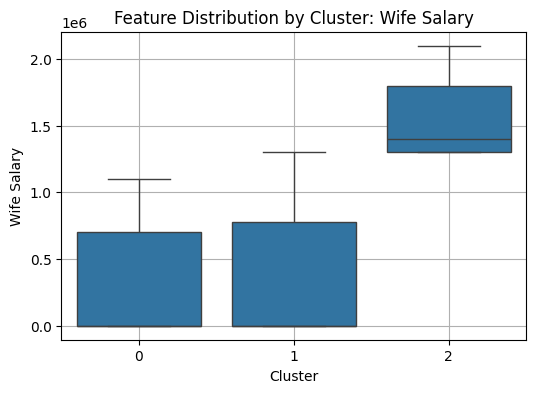

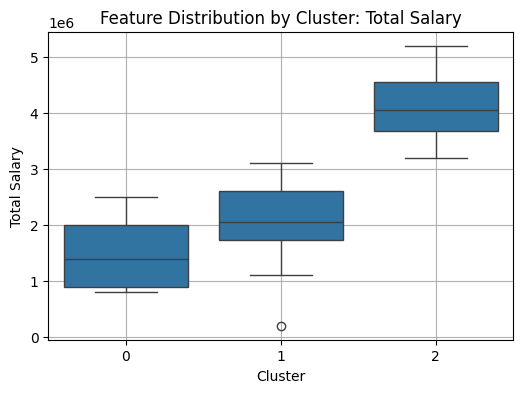

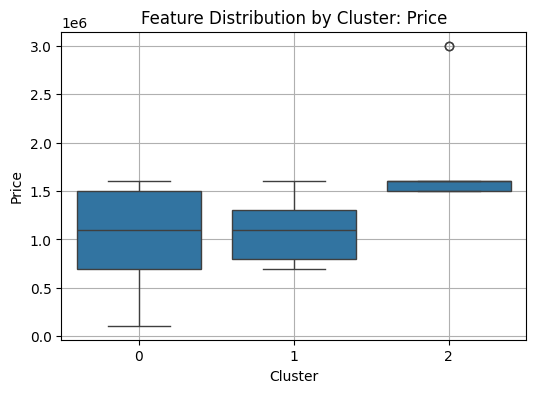

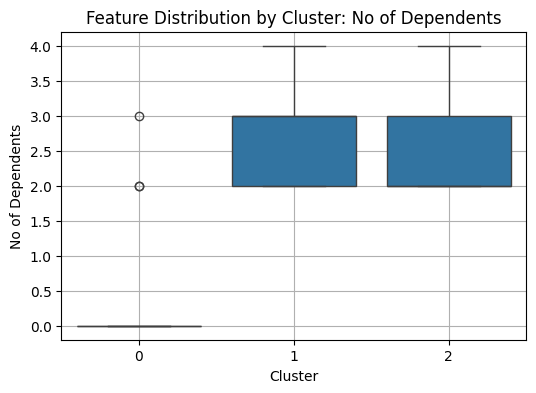

In [40]:
for col in features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Feature Distribution by Cluster: {col}')
    plt.grid(True)
    plt.show()

In [43]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

               Age  Profession  Marrital Status  Education  No of Dependents  \
Cluster                                                                        
0        29.400000    0.640000              0.6   0.560000          0.280000   
1        37.758621    0.603448              0.0   0.534483          2.913793   
2        41.875000    0.812500              0.0   0.687500          2.500000   

         Personal loan  House Loan  Wife Working        Salary   Wife Salary  \
Cluster                                                                        
0             0.240000      0.0400          0.36  1.220000e+06  2.480000e+05   
1             0.396552      0.5000          0.50  1.718966e+06  3.724138e+05   
2             0.187500      0.4375          1.00  2.606250e+06  1.568750e+06   

         Total Salary      Make         Price     Loans  
Cluster                                                  
0        1.468000e+06  3.120000  1.056400e+06  0.280000  
1        2.091379e+06  3